In [3]:
import numpy as np
import context

a=0
b=1
deg=5
r, w =np.polynomial.legendre.leggauss(deg)
print("r",r)
print("w",w)
nw=w*(b-a)/2
nr=(b-a)/2*(r+1)
print("nw",nw)
print("nr",nr)
sum(nw)

r [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
w [ 0.23692689  0.47862867  0.56888889  0.47862867  0.23692689]
nw [ 0.11846344  0.23931434  0.28444444  0.23931434  0.11846344]
nr [ 0.04691008  0.23076534  0.5         0.76923466  0.95308992]


1.0

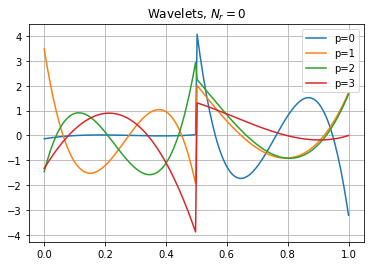

tst ww(2,2)=1.0
tst wp(3,1)=-1.5716594692349872e-15
0 3.95804777476
1 3.2923995315
2 3.02651064918
3 1.30784495205


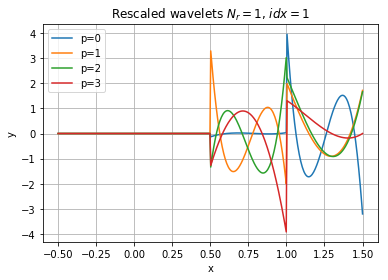

tst rsww(1,1)=1.0000000000000155


5.5511151231257827e-17

In [4]:
#import numpy as np
import matplotlib.pyplot as plt
import aMRPC.wavetools as wt

P=4 #number of terms
qdeg=4*P+2 # allways even
qdeg=-1
wv=wt.WaveTools(P,qdeg,lb=-.5,rb=1.5)
#wv=wt.wavetools(P,qdeg)
wv.genWVlets()
x=np.linspace(0,1,200)
#wv.setNLRB(lb=-.2,rb=1.3)
xx=np.linspace(wv.lb,wv.rb,400)

for p in range(P):
    y=wv.fpsi(p,x)
    #y=wv.fr(p,x)
    #y=wv.fs(x)* (x**0) +(x**0)*(wv.alpha[0,0])
    plt.plot(x,y,label='p='+str(p))
#ax.legend(arange(P))
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Wavelets, $N_r=0$')
plt.show()

i=min(P-1,2)
j=min(P-1,2)
print("tst ww({},{})={}".format(i,j,(wv.fpsi(i,wv.roots)* wv.fpsi(j,wv.roots)) @ wv.weights))
i=min(P-1,3)
j=min(P-1,1)
print("tst wp({},{})={}".format(i,j,(wv.fpsi(i,wv.roots)* wv.roots**j )@ wv.weights))
#print(wv.alpha)
Nr=1
Nri=1
for p in range(P):
    y=wv.rfpsi(xx,p,Nr,Nri)
    plt.plot(xx,y,label='p='+str(p))
    print(p,max(y))
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rescaled wavelets $N_r=$'+str(Nr)+', $idx=$'+str(Nri))
plt.grid(True)
plt.show()

i=min(P-1,1)
j=min(P-1,1)
rrts=wv.rescY(wv.roots,Nr,Nri)
print("tst rsww({},{})={}".format(i,j,
                                  (wv.rfpsi(rrts,i,Nr,Nri)* wv.rfpsi(rrts,j,Nr,Nri)
                                   *wv.rqCf(Nr)) @ wv.weights))
#print(x)
#print(y)
# quadrature check
(wv.roots* wv.vfs(wv.roots))@wv.weights - (1-2**(0-(1+1)))/(1+1+1)